<a href="https://colab.research.google.com/github/Nguyen-Van-Truong/ML2023/blob/main/Lab_7_20130187_NguyenVanTruong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [ ]:
# code
from sklearn import datasets
from sklearn import svm
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,  f_classif
import pandas as pd

# cross validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-means
from sklearn.cluster import KMeans
# naive_bayes
from sklearn.naive_bayes import GaussianNB
# knn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import AgglomerativeClustering

# dendrogram
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab7'


Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/lab7


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
iris_datasets = datasets.load_iris()
X = iris_datasets.data
y = iris_datasets.target

# SVM Linenear Kernel
clf = svm.SVC(kernel='linear', random_state=0)
scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))






['fit_time', 'score_time', 'test_score']
0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code
iris_datasets = datasets.load_iris()
# X = iris_datasets.data
X = iris_datasets['data']
y = iris_datasets.target
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(X, y)
features = fit.transform(X)

# random forest
rfc=RandomForestClassifier(n_estimators=100)
scores = cross_validate(rfc, features, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# code
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

kmeans = KMeans(n_clusters = 10, random_state = 0)
scores = cross_validate(kmeans, X, y, scoring='recall_macro', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

['fit_time', 'score_time', 'test_score']
0.08915183178534572


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

# bayes GaussianNB
gnb = GaussianNB()
scores = cross_validate(gnb, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=10)
print('Naive Bayes Results:')
print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Naive Bayes Results:
Accuracy: 0.8113904407200497
Precision: 0.8480837289405493
Recall: 0.8114189886480908
F1: 0.8090382615408214


In [ ]:
# random forest
rfc = RandomForestClassifier(n_estimators=100)
scores = cross_validate(rfc, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=10)
print('Random Forest Results:')
print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

Random Forest Results:
Accuracy: 0.9493451272501551
Precision: 0.9543491347291824
Recall: 0.9493997248022017
F1: 0.9487635642433434


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], cv=10)
print('KNN Results:')
print('Accuracy:', np.mean(scores['test_accuracy']))
print('Precision:', np.mean(scores['test_precision_macro']))
print('Recall:', np.mean(scores['test_recall_macro']))
print('F1:', np.mean(scores['test_f1_macro']))

KNN Results:
Accuracy: 0.9716294227188081
Precision: 0.9745645728626379
Recall: 0.9715187478500174
F1: 0.9715505814420695


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
# Supervised learning is better


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[7 9 4 ... 4 1 4]


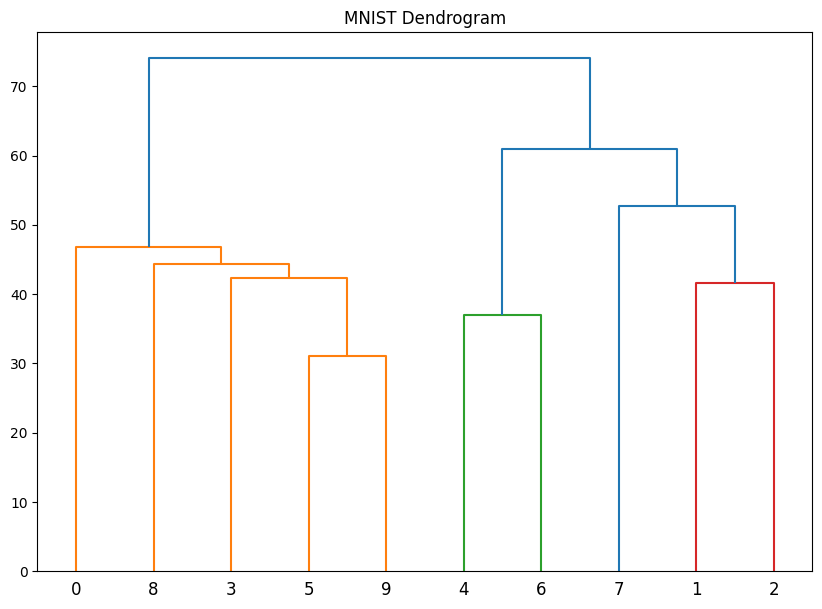

In [ ]:
mnist = datasets.load_digits()

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(mnist.data)

# print dendogram
plt.figure(figsize=(10, 7))
plt.title("MNIST Dendrogram")
dend = shc.dendrogram(shc.linkage(mnist.data[:10, :], method='ward'))

print(labels)


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





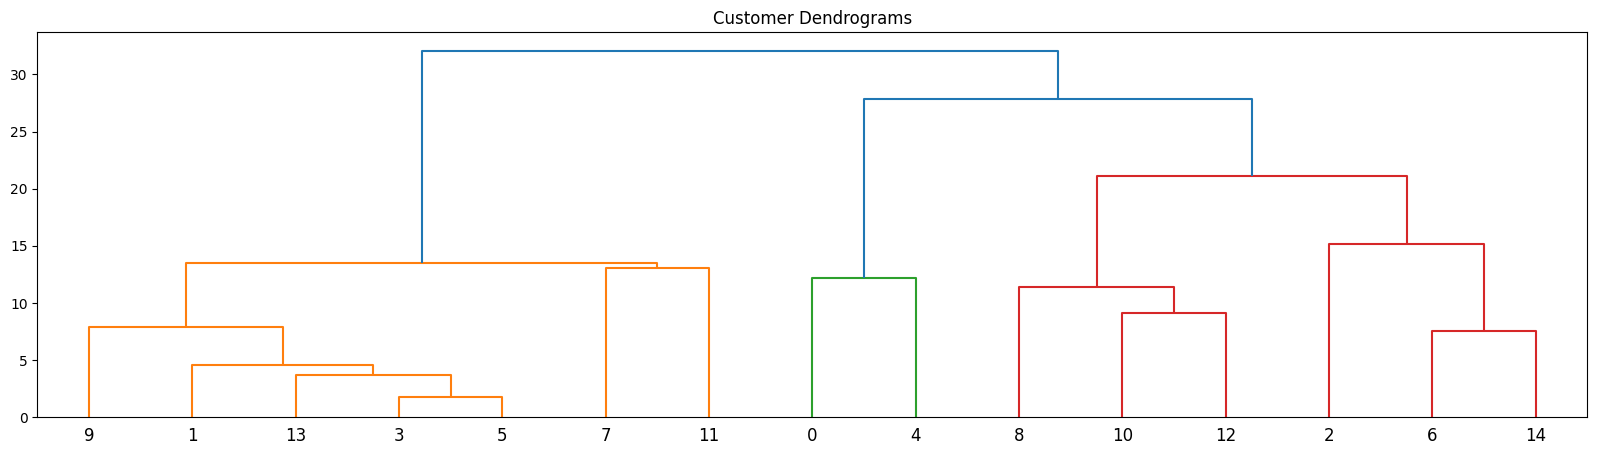

In [ ]:
#code
shoppingdata = pd.read_csv("shopping-data.csv")


shoppingdata = shoppingdata.drop(['CustomerID', 'Genre'], axis=1)

plt.figure(figsize=(20, 5))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(shoppingdata.iloc[:15, :], method='single'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

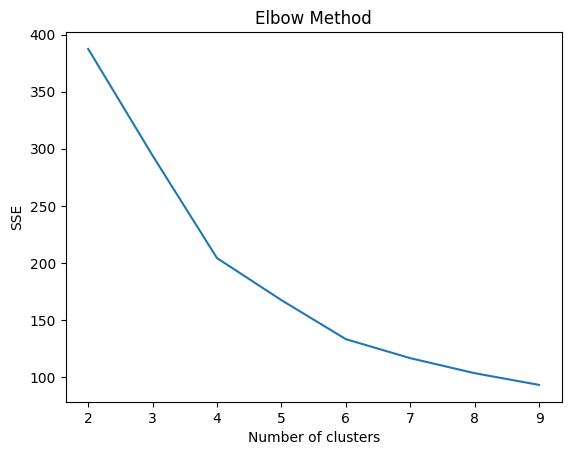

In [ ]:
#code
shoppingdata = pd.read_csv("shopping-data.csv")
shoppingdata = shoppingdata.drop(['CustomerID', 'Genre'], axis=1)
shoppingdata = (shoppingdata - shoppingdata.mean()) / shoppingdata.std()

sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(shoppingdata)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code
shoppingdata = pd.read_csv("shopping-data.csv")

shoppingdata = shoppingdata.drop(['CustomerID', 'Genre'], axis=1)
agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative.fit(shoppingdata)

print(agglomerative.labels_)

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.